In [28]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline
from copy import deepcopy
from numpy import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [14]:
import pandas as pd

from sklearn.cluster import KMeans

In [10]:
df = pd.read_excel('完整指标.xlsx')
del df['店铺']

In [33]:
df

,卖家信用,距今天数,描述相符,所在地区,服务态度,店铺收藏数,物流服务,宝贝数,月销量,好评率,...,运费险,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比
0,18,1892,4.8,4,4.8,1096537,4.8,842,18400,0.9952,...,0,86.300000,0,0.738739,1,1,1,0.0,717800.00,-0.270000
1,13,4688,4.7,2,4.8,48715,4.8,23,60,0.9818,...,0,0.000000,1,0.629630,1,1,0,0.0,1032200.00,0.550000
2,11,4363,0.0,2,0.0,270,0.0,10,9,0.9920,...,0,0.000000,0,0.719298,0,0,0,0.0,3072100.00,-0.330000
3,18,4353,4.7,4,4.8,1527657,4.8,877,50300,0.9916,...,0,0.000000,0,0.697286,1,1,0,0.0,1557100.00,0.080000
4,16,4185,4.8,6,4.8,263081,4.8,1672,3223,0.9972,...,1,53.033333,0,0.877551,1,1,1,0.0,284600.00,-0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,11,185,0.0,5,0.0,164,0.0,213,0,0.9833,...,0,1.150000,0,0.940035,1,1,0,0.0,10100.00,-0.158004
223,11,297,0.0,4,0.0,1203,0.0,94,0,0.9996,...,1,4.210000,0,0.747742,1,1,0,0.0,19500.00,-0.202204
224,11,250,0.0,4,0.0,1174,0.0,20,0,0.9977,...,1,0.000000,0,1.000000,1,1,0,0.0,32800.00,0.107614
225,10,221,0.0,5,0.0,93,0.0,179,0,0.9782,...,1,2.730000,0,0.643793,1,1,0,0.0,8071.52,0.540808


In [12]:
df = df.dropna()

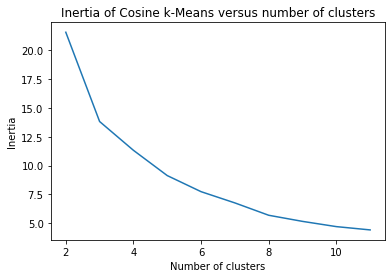

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(df)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)


In [30]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
#欧几里得距离和余弦距离效果对比测试
from sklearn.metrics import silhouette_score
# Prepare models
kmeans = KMeans(n_clusters=5).fit(df)
normalized_vectors = preprocessing.normalize(df)
normalized_kmeans = KMeans(n_clusters=5).fit(normalized_vectors)
min_samples = df.shape[1]+1 
print('kmeans: {}'.format(silhouette_score(df, kmeans.labels_, metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.6269642928604435
Cosine kmeans:0.7556685630115563


In [23]:
from sklearn.manifold import TSNE

In [73]:
from sklearn.decomposition import PCA

In [21]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
df

,卖家信用,距今天数,描述相符,所在地区,服务态度,店铺收藏数,物流服务,宝贝数,月销量,好评率,...,运费险,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比
0,18,1892,4.8,4,4.8,1096537,4.8,842,18400,0.9952,...,0,86.300000,0,0.738739,1,1,1,0.0,717800.00,-0.270000
1,13,4688,4.7,2,4.8,48715,4.8,23,60,0.9818,...,0,0.000000,1,0.629630,1,1,0,0.0,1032200.00,0.550000
2,11,4363,0.0,2,0.0,270,0.0,10,9,0.9920,...,0,0.000000,0,0.719298,0,0,0,0.0,3072100.00,-0.330000
3,18,4353,4.7,4,4.8,1527657,4.8,877,50300,0.9916,...,0,0.000000,0,0.697286,1,1,0,0.0,1557100.00,0.080000
4,16,4185,4.8,6,4.8,263081,4.8,1672,3223,0.9972,...,1,53.033333,0,0.877551,1,1,1,0.0,284600.00,-0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,11,185,0.0,5,0.0,164,0.0,213,0,0.9833,...,0,1.150000,0,0.940035,1,1,0,0.0,10100.00,-0.158004
223,11,297,0.0,4,0.0,1203,0.0,94,0,0.9996,...,1,4.210000,0,0.747742,1,1,0,0.0,19500.00,-0.202204
224,11,250,0.0,4,0.0,1174,0.0,20,0,0.9977,...,1,0.000000,0,1.000000,1,1,0,0.0,32800.00,0.107614
225,10,221,0.0,5,0.0,93,0.0,179,0,0.9782,...,1,2.730000,0,0.643793,1,1,0,0.0,8071.52,0.540808


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled['normalized_kmeans'] = normalized_kmeans.labels_
df_mean = (df_scaled.loc[df_scaled.normalized_kmeans!=-1, :].groupby('normalized_kmeans').mean())


In [51]:
df = pd.read_excel('kp最终结果.xlsx')
df = df.drop(columns=['Unnamed: 0','店铺'])
df.dtypes

卖家信用        int64
距今天数        int64
描述相符      float64
宝贝数         int64
好评率       float64
是否金牌卖家      int64
是否有实体店      int64
男装          int64
女装          int64
曝光度         int64
热度          int64
收藏数中位数      int64
价格均值      float64
平均月销量     float64
发货时间      float64
运费险         int64
公益宝贝计划    float64
订单险         int64
交易成功比率    float64
蚂蚁花呗支付      int64
信用卡支付       int64
是否直播        int64
7天上新数       int64
30天销售额    float64
销售环比      float64
labels      int64
dtype: object

In [47]:
preprocessing.normalize(df)

array([[ 2.50688492e-05,  2.63501460e-03,  6.68502647e-06, ...,
         9.99689999e-01, -3.76032739e-07,  5.57085539e-06],
       [ 1.96944529e-05,  5.22887723e-03,  7.87778114e-06, ...,
         9.99985844e-01,  1.47708396e-07,  6.56481762e-06],
       [ 2.60221147e-05,  3.57804077e-03,  9.10774015e-06, ...,
         9.99992694e-01,  1.05947181e-05,  7.43488992e-06],
       ...,
       [ 2.38146789e-05,  6.46171620e-03,  9.72432721e-06, ...,
         9.98628867e-01,  1.03196942e-06,  0.00000000e+00],
       [ 1.89343630e-04,  5.65979669e-02,  7.24239387e-05, ...,
         8.74136427e-01, -1.42952082e-05,  0.00000000e+00],
       [ 3.56132828e-04,  8.44628358e-02,  1.45420905e-04, ...,
         3.70971696e-01, -5.50404662e-06,  0.00000000e+00]])

In [48]:
df.columns

Index(['卖家信用', '距今天数', '描述相符', '宝贝数', '好评率', '是否金牌卖家', '是否有实体店', '男装', '女装',
       '曝光度', '热度', '收藏数中位数', '价格均值', '平均月销量', '发货时间', '运费险', '公益宝贝计划', '订单险',
       '交易成功比率', '蚂蚁花呗支付', '信用卡支付', '是否直播', '7天上新数', '30天销售额', '销售环比',
       'labels'],
      dtype='object')

In [52]:
df2 = pd.DataFrame(preprocessing.normalize(df.iloc[:,:-1]),columns=df.columns[:-1])
df2

,卖家信用,距今天数,描述相符,宝贝数,好评率,是否金牌卖家,是否有实体店,男装,女装,曝光度,...,运费险,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比
0,0.000025,0.002635,6.685026e-06,0.001173,1.386029e-06,1.392714e-06,0.000000e+00,1.392714e-06,0.000000e+00,0.000054,...,0.000000e+00,0.000120,0.000000e+00,1.028852e-06,1.392714e-06,1.392714e-06,1.392714e-06,0.000000e+00,0.999690,-3.760327e-07
1,0.000020,0.005229,7.877781e-06,0.000886,1.636281e-06,1.641204e-06,0.000000e+00,1.641204e-06,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.641204e-06,1.641204e-06,0.000000e+00,0.999986,1.477084e-07
2,0.000026,0.003578,9.107740e-06,0.001022,1.856678e-06,1.858722e-06,0.000000e+00,0.000000e+00,1.858722e-06,0.000000,...,1.858722e-06,0.000715,1.858722e-06,0.000000e+00,1.858722e-06,1.858722e-06,0.000000e+00,0.000000e+00,0.999993,1.059472e-05
3,0.000005,0.000336,2.238639e-06,0.000027,4.472800e-07,4.477278e-07,0.000000e+00,0.000000e+00,4.477278e-07,0.000000,...,0.000000e+00,0.000000,0.000000e+00,2.855076e-07,4.477278e-07,4.477278e-07,0.000000e+00,0.000000e+00,1.000000,4.477278e-09
4,0.000002,0.000373,4.895116e-07,0.000038,1.062848e-07,1.066474e-07,0.000000e+00,1.066474e-07,1.066474e-07,0.000007,...,0.000000e+00,0.000015,1.066474e-07,8.184568e-08,1.066474e-07,1.066474e-07,1.066474e-07,4.265896e-07,0.999990,1.173121e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.000012,0.002394,4.708645e-06,0.000012,9.556627e-07,9.609479e-07,9.609479e-07,0.000000e+00,0.000000e+00,0.000048,...,9.609479e-07,0.000000,0.000000e+00,7.356802e-07,9.609479e-07,9.609479e-07,0.000000e+00,1.431812e-04,0.999098,1.441422e-07
222,0.000016,0.002391,4.518338e-06,0.006812,9.557728e-07,0.000000e+00,0.000000e+00,0.000000e+00,9.613486e-07,0.000089,...,0.000000e+00,0.000000,9.613486e-07,5.292273e-07,9.613486e-07,9.613486e-07,0.000000e+00,1.432409e-04,0.999514,1.442023e-07
223,0.000024,0.006462,9.724327e-06,0.000333,1.976618e-06,0.000000e+00,0.000000e+00,1.984557e-06,0.000000e+00,0.000087,...,0.000000e+00,0.000000,0.000000e+00,1.984557e-06,1.984557e-06,1.984557e-06,0.000000e+00,7.303168e-04,0.998629,1.031969e-06
224,0.000189,0.056598,7.242394e-05,0.005333,1.530370e-05,0.000000e+00,0.000000e+00,1.577864e-05,0.000000e+00,0.001325,...,0.000000e+00,0.001362,0.000000e+00,1.165629e-05,1.577864e-05,1.577864e-05,0.000000e+00,1.577864e-05,0.874136,-1.429521e-05


In [53]:
df2['labels'] = df['labels']
df2

,卖家信用,距今天数,描述相符,宝贝数,好评率,是否金牌卖家,是否有实体店,男装,女装,曝光度,...,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比,labels
0,0.000025,0.002635,6.685026e-06,0.001173,1.386029e-06,1.392714e-06,0.000000e+00,1.392714e-06,0.000000e+00,0.000054,...,0.000120,0.000000e+00,1.028852e-06,1.392714e-06,1.392714e-06,1.392714e-06,0.000000e+00,0.999690,-3.760327e-07,4
1,0.000020,0.005229,7.877781e-06,0.000886,1.636281e-06,1.641204e-06,0.000000e+00,1.641204e-06,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.641204e-06,1.641204e-06,0.000000e+00,0.999986,1.477084e-07,4
2,0.000026,0.003578,9.107740e-06,0.001022,1.856678e-06,1.858722e-06,0.000000e+00,0.000000e+00,1.858722e-06,0.000000,...,0.000715,1.858722e-06,0.000000e+00,1.858722e-06,1.858722e-06,0.000000e+00,0.000000e+00,0.999993,1.059472e-05,4
3,0.000005,0.000336,2.238639e-06,0.000027,4.472800e-07,4.477278e-07,0.000000e+00,0.000000e+00,4.477278e-07,0.000000,...,0.000000,0.000000e+00,2.855076e-07,4.477278e-07,4.477278e-07,0.000000e+00,0.000000e+00,1.000000,4.477278e-09,4
4,0.000002,0.000373,4.895116e-07,0.000038,1.062848e-07,1.066474e-07,0.000000e+00,1.066474e-07,1.066474e-07,0.000007,...,0.000015,1.066474e-07,8.184568e-08,1.066474e-07,1.066474e-07,1.066474e-07,4.265896e-07,0.999990,1.173121e-08,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.000012,0.002394,4.708645e-06,0.000012,9.556627e-07,9.609479e-07,9.609479e-07,0.000000e+00,0.000000e+00,0.000048,...,0.000000,0.000000e+00,7.356802e-07,9.609479e-07,9.609479e-07,0.000000e+00,1.431812e-04,0.999098,1.441422e-07,0
222,0.000016,0.002391,4.518338e-06,0.006812,9.557728e-07,0.000000e+00,0.000000e+00,0.000000e+00,9.613486e-07,0.000089,...,0.000000,9.613486e-07,5.292273e-07,9.613486e-07,9.613486e-07,0.000000e+00,1.432409e-04,0.999514,1.442023e-07,0
223,0.000024,0.006462,9.724327e-06,0.000333,1.976618e-06,0.000000e+00,0.000000e+00,1.984557e-06,0.000000e+00,0.000087,...,0.000000,0.000000e+00,1.984557e-06,1.984557e-06,1.984557e-06,0.000000e+00,7.303168e-04,0.998629,1.031969e-06,0
224,0.000189,0.056598,7.242394e-05,0.005333,1.530370e-05,0.000000e+00,0.000000e+00,1.577864e-05,0.000000e+00,0.001325,...,0.001362,0.000000e+00,1.165629e-05,1.577864e-05,1.577864e-05,0.000000e+00,1.577864e-05,0.874136,-1.429521e-05,0


In [54]:
df_mean = (df2.loc[df.labels!=-1, :].groupby('labels').mean())

In [72]:
df_mean

,卖家信用,距今天数,描述相符,宝贝数,好评率,是否金牌卖家,是否有实体店,男装,女装,曝光度,...,运费险,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比
labels,,,,,,,,,,,,,,,,,,,,,
0,0.000039,0.008583,0.000014,0.002080,0.000003,2.053947e-06,6.520870e-07,2.448040e-06,6.316860e-07,0.000311,...,2.490640e-07,0.000341,2.992336e-07,1.355455e-06,0.000002,0.000003,1.503018e-07,0.000084,0.968445,-6.221895e-07
1,0.000023,0.002700,0.000006,0.004924,0.000001,6.385381e-07,0.000000e+00,4.440925e-07,1.242618e-06,0.000071,...,8.973981e-07,0.037017,6.410849e-07,8.749916e-07,0.000001,0.000001,5.272277e-07,0.000101,0.995632,-1.299943e-07
2,0.000355,0.052538,0.000133,0.011816,0.000028,1.149868e-05,6.307922e-06,1.623521e-05,1.118794e-05,0.000086,...,1.081169e-05,0.006214,8.421133e-06,1.938785e-05,0.000025,0.000025,6.466266e-06,0.000072,0.961606,2.737011e-06
3,0.000518,0.086944,0.000021,0.011748,0.000046,2.361226e-05,1.298385e-05,3.251630e-05,2.023528e-06,0.000349,...,3.185808e-05,0.001446,8.424451e-07,3.795417e-05,0.000044,0.000043,4.390080e-08,0.000062,0.863246,2.259733e-06
4,0.000036,0.004150,0.000015,0.002525,0.000003,2.974821e-06,0.000000e+00,2.761701e-06,3.209005e-07,0.000042,...,1.577285e-07,0.000088,1.637808e-07,1.228863e-06,0.000003,0.000003,3.732041e-07,0.000013,0.998488,3.000591e-06


In [56]:
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False

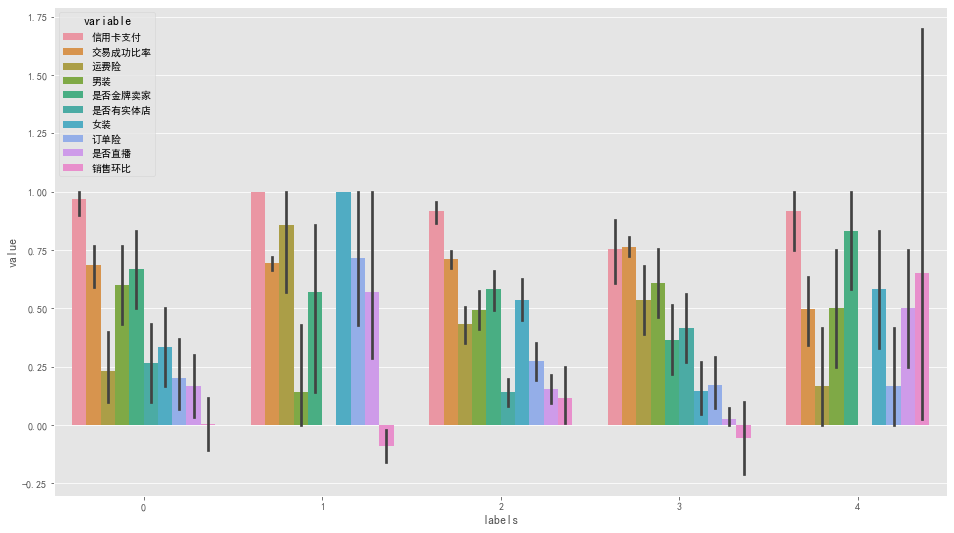

In [105]:
#同簇内各变量方差可视化
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False,).iloc[-10:,:].Variable.values) + ['labels']
tidy = df[selected_columns].melt(id_vars='labels')
sns.barplot(x='labels', y='value', hue='variable', data=tidy)

In [ ]:
#聚类效果可视化

In [2]:
import pandas as pd

In [10]:
data = pd.read_excel('kp最终结果.xlsx').drop(columns=['Unnamed: 0','店铺'])
data.dtypes
data=data.dropna()

In [18]:
data = data.dropna()
data

,卖家信用,距今天数,描述相符,宝贝数,好评率,是否金牌卖家,是否有实体店,男装,女装,曝光度,...,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比,labels
0,18,1892,4.80,842,0.9952,1,0,1,0,39,...,86.300000,0,0.738739,1,1,1,0,717800.0,-0.270000,4
1,12,3186,4.80,540,0.9970,1,0,1,0,0,...,0.000000,0,0.000000,0,1,1,0,609300.0,0.090000,4
2,14,1925,4.90,550,0.9989,1,0,0,1,0,...,384.897333,1,0.000000,1,1,0,0,538000.0,5.700000,4
3,12,750,5.00,60,0.9990,1,0,0,1,0,...,0.000000,0,0.637681,1,1,0,0,2233500.0,0.010000,4
4,15,3502,4.59,355,0.9966,1,0,1,1,61,...,141.020000,1,0.767442,1,1,1,4,9376600.0,0.110000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,12,2491,4.90,12,0.9945,1,1,0,0,50,...,0.000000,0,0.765578,1,1,0,149,1039700.0,0.150000,0
222,17,2487,4.70,7086,0.9942,0,0,0,1,93,...,0.000000,1,0.550505,1,1,0,149,1039700.0,0.150000,0
223,12,3256,4.90,168,0.9960,0,0,1,0,44,...,0.000000,0,1.000000,1,1,0,368,503200.0,0.520000,0
224,12,3587,4.59,338,0.9699,0,0,1,0,84,...,86.300000,0,0.738739,1,1,0,1,55400.0,-0.905985,0


In [25]:
from sklearn.decomposition import KernelPCA
plt.rcParams['figure.figsize'] = (16, 9)

In [32]:
scikit_kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)

# 使用KPCA降低数据维度，直接获得投影后的坐标
X_skernpca = scikit_kpca.fit_transform(data.iloc[:,:-1].values)


In [30]:
y = data['labels'].values

In [34]:
result = pd.DataFrame(X_skernpca,columns=['V1','V2','V3'])
result = pd.concat([result,data],axis=1)
result

,V1,V2,V3,卖家信用,距今天数,描述相符,宝贝数,好评率,是否金牌卖家,是否有实体店,...,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比,labels
0,-0.002982,0.021706,0.025664,18,1892,4.80,842,0.9952,1,0,...,86.300000,0,0.738739,1,1,1,0,717800.0,-0.270000,4
1,-0.000982,0.092083,0.001317,12,3186,4.80,540,0.9970,1,0,...,0.000000,0,0.000000,0,1,1,0,609300.0,0.090000,4
2,-0.001373,-0.025727,-0.017943,14,1925,4.90,550,0.9989,1,0,...,384.897333,1,0.000000,1,1,0,0,538000.0,5.700000,4
3,-0.010862,-0.012724,-0.031863,12,750,5.00,60,0.9990,1,0,...,0.000000,0,0.637681,1,1,0,0,2233500.0,0.010000,4
4,0.025839,-0.003021,-0.021112,15,3502,4.59,355,0.9966,1,0,...,141.020000,1,0.767442,1,1,1,4,9376600.0,0.110000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.015370,-0.005484,-0.001692,12,2491,4.90,12,0.9945,1,1,...,0.000000,0,0.765578,1,1,0,149,1039700.0,0.150000,0
222,0.000014,-0.012764,-0.006085,17,2487,4.70,7086,0.9942,0,0,...,0.000000,1,0.550505,1,1,0,149,1039700.0,0.150000,0
223,-0.012798,-0.008703,-0.011888,12,3256,4.90,168,0.9960,0,0,...,0.000000,0,1.000000,1,1,0,368,503200.0,0.520000,0
224,0.005364,-0.007017,-0.013939,12,3587,4.59,338,0.9699,0,0,...,86.300000,0,0.738739,1,1,0,1,55400.0,-0.905985,0


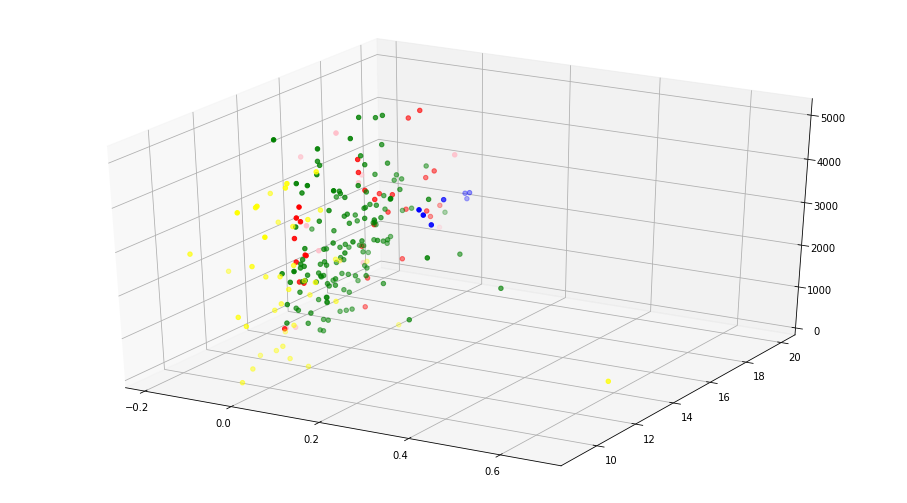

In [35]:
#三维图
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(result[y==0].iloc[:,2],result[y==0].iloc[:,3], result[y==0].iloc[:,4], s=20, c='red', marker='o')
ax2.scatter(result[y==1].iloc[:,2],result[y==1].iloc[:,3], result[y==1].iloc[:,4], s=20, c='blue', marker='o')
ax2.scatter(result[y==2].iloc[:,2],result[y==2].iloc[:,3], result[y==2].iloc[:,4], s=20, c='green', marker='o')
ax2.scatter(result[y==3].iloc[:,2],result[y==3].iloc[:,3], result[y==3].iloc[:,4], s=20, c='yellow', marker='o')
ax2.scatter(result[y==4].iloc[:,2],result[y==4].iloc[:,3], result[y==4].iloc[:,4], s=20, c='pink', marker='o')

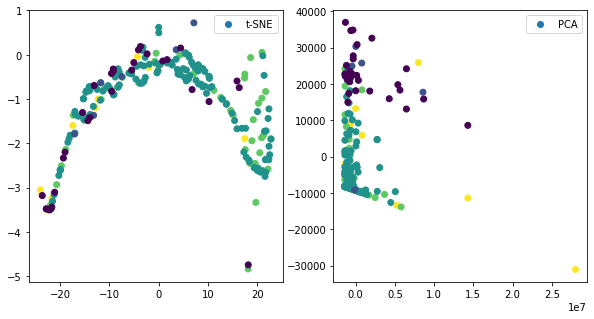

In [36]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os


#PCA和t-SNE二维可视化

X_tsne = TSNE(n_components=2,random_state=33).fit_transform(data.iloc[:,:-1].values)
X_pca = PCA(n_components=2).fit_transform(data.iloc[:,:-1].values)

ckpt_dir="images"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['labels'].values,label="t-SNE")
plt.legend()
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['labels'].values,label="PCA")
plt.legend()
plt.show()